In [1]:
import math
import numpy as np
import copy
%matplotlib notebook
import matplotlib.pyplot as plt
plt.ion()

In [2]:
def short_harmonic(x: float, x1: float, x2: float, top_val: float = None) -> float:
    lb=0
    hb=0
    if x1 > x2:
        lb=x2
        hb=x1
    elif x1 < x2:
        lb=x1
        hb=x2
    elif abs(x1-x2) <= 0.05:
        return 0.0
    
    if x > hb or x < lb:
        return 0.0
    
    m=2*math.pi/(hb-lb)
    n=-((hb+3*lb)*math.pi/(2*(hb-lb)))
    return 0.5*top_val*(math.sin(m*x+n)+1.0) 

def get_gaussian(w: float, x: float, x1: float, x2: float, sigma: float = None):
    if abs(x1 - x2) <= 0.005:
        return 0

    # Determino los límites del intervalo
    lb = min(x1, x2)
    hb = max(x1, x2)

    if not sigma:
        mu = (hb + lb) / 2
        sigma = (mu - lb)*0.3

    return (w * (np.exp((x - lb) * (hb - x) / ((sigma) ** 2))))

def get_bounded_gaussian(x: float, x1: float, x2: float, top_val: float = None) -> float:
    if not top_val:
        return 0
    sign = int(top_val/abs(top_val))
    w = sign*1.00000e-5
    #print('w: {}, denom: {}'.format(w, top_val/(w)))
    sigma = abs(x2-x1)/math.sqrt(4*math.log(top_val/(w)))
    #print('Sigma: {}, w: {}'.format(sigma, w))
    return get_gaussian(x=x, x1=x1, x2=x2, w=w, sigma=sigma)

# Gaussians vs Harmonics

<IPython.core.display.Javascript object>


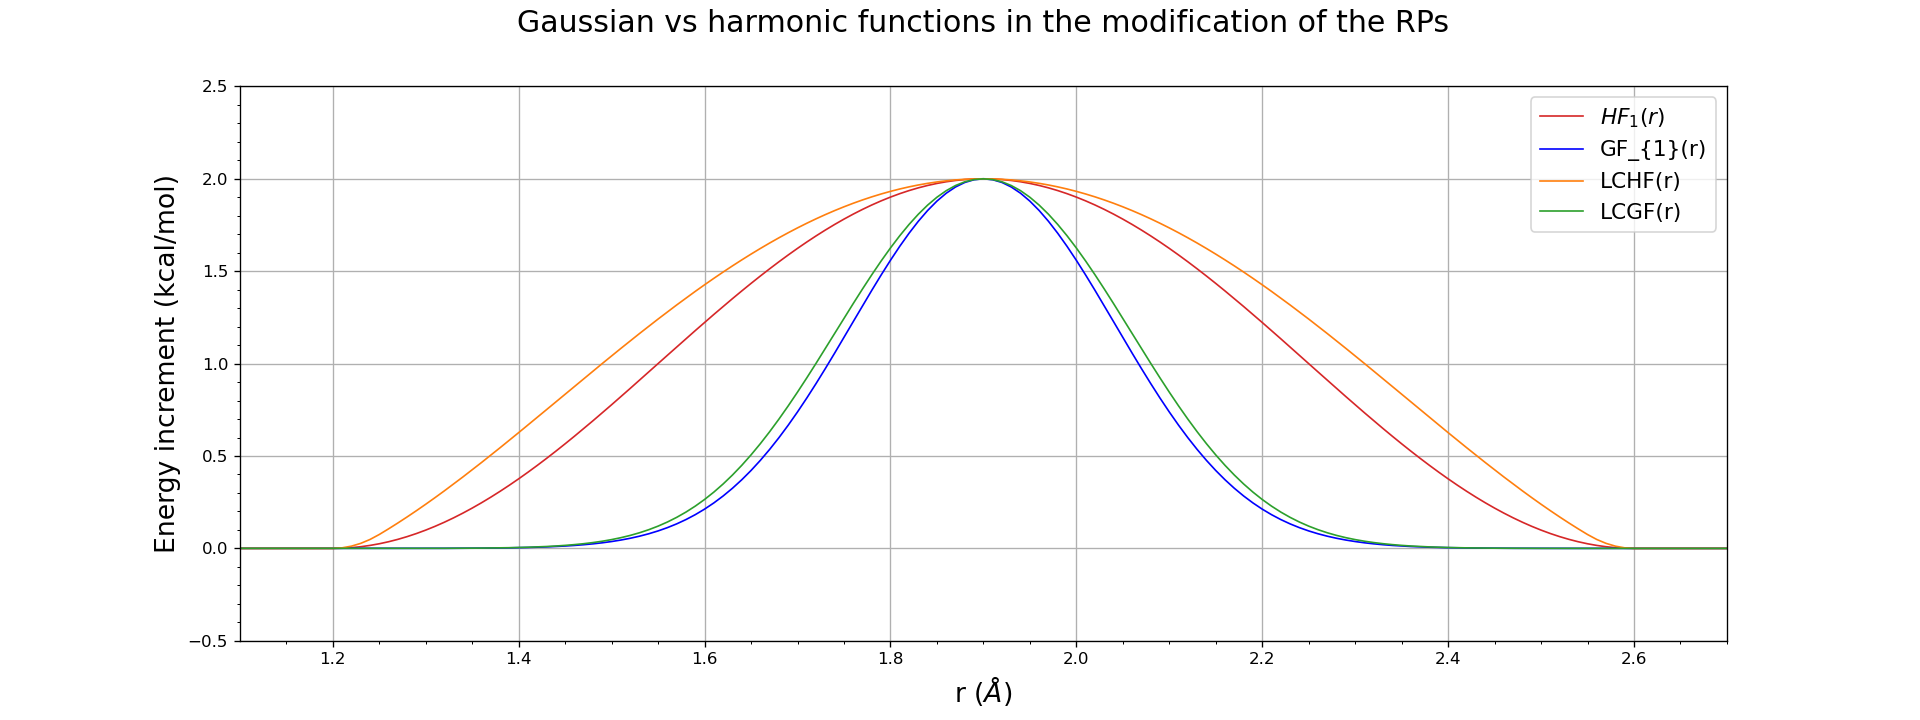

In [15]:
dist=np.arange(0.0,3.5,0.01)
#f1=np.array([math.sqrt(math.pow(short_harmonic(x=x, x1=1.15, x2=2.65, top_val=4.0), 1.0)*math.pow(get_bounded_gaussian(x=x, x1=1.15, x2=2.65, top_val=4.0), 1.0))  for x in dist])
f2=np.array([get_bounded_gaussian(x=x, x1=1.2, x2=2.6, top_val=6.0)+get_bounded_gaussian(x=x, x1=1.25, x2=2.55, top_val=-4.0)   for x in dist])
f3=np.array([short_harmonic(x=x, x1=1.2, x2=2.6, top_val=6.0)+short_harmonic(x=x, x1=1.25, x2=2.55, top_val=-4.0)  for x in dist])
f4=np.array([get_bounded_gaussian(x=x, x1=1.2, x2=2.6, top_val=2.0)   for x in dist])
f5=np.array([short_harmonic(x=x, x1=1.2, x2=2.6, top_val=2.0)  for x in dist])
plt.figure(figsize=(16, 6))
font = {'color':  'black',
        'weight': 'normal',
        'size': 18}
plt.title('Gaussian vs harmonic functions in the modification of the RPs', fontdict=font, y=1.08 )
#plt.plot(dist, f1, label="weighted_geom_comb", linestyle='solid', linewidth=1, marker='h', markersize=0.0)
plt.plot(dist, f5, label="$HF_{1}(r)$", linestyle='solid', linewidth=1, marker='>', markersize=0.0, c='tab:red')

plt.plot(dist, f4, label="GF_{1}(r)", linestyle='solid', linewidth=1, marker='s', markersize=0.0, c='b')

plt.plot(dist, f3, label="LCHF(r)", linestyle='solid', linewidth=1, marker='p', markersize=0.0, c='tab:orange')

plt.plot(dist, f2, label="LCGF(r)", linestyle='solid', linewidth=1, marker='*', markersize=0.0, c='tab:green')



plt.xlim(1.1, 2.7)
plt.ylim(-0.5, 2.5)
plt.grid()
#plt.tight_layout()
plt.minorticks_on()
plt.xlabel(r'r ($\AA$)', fontsize=16)
plt.ylabel(r'Energy increment (kcal/mol)', fontsize=16)
plt.legend(fontsize=13)
plt.savefig('Gaussians_vs_harmonics.png', dpi=1200, transparent=True)
plt.show()

# Sums of Harmonics

<IPython.core.display.Javascript object>


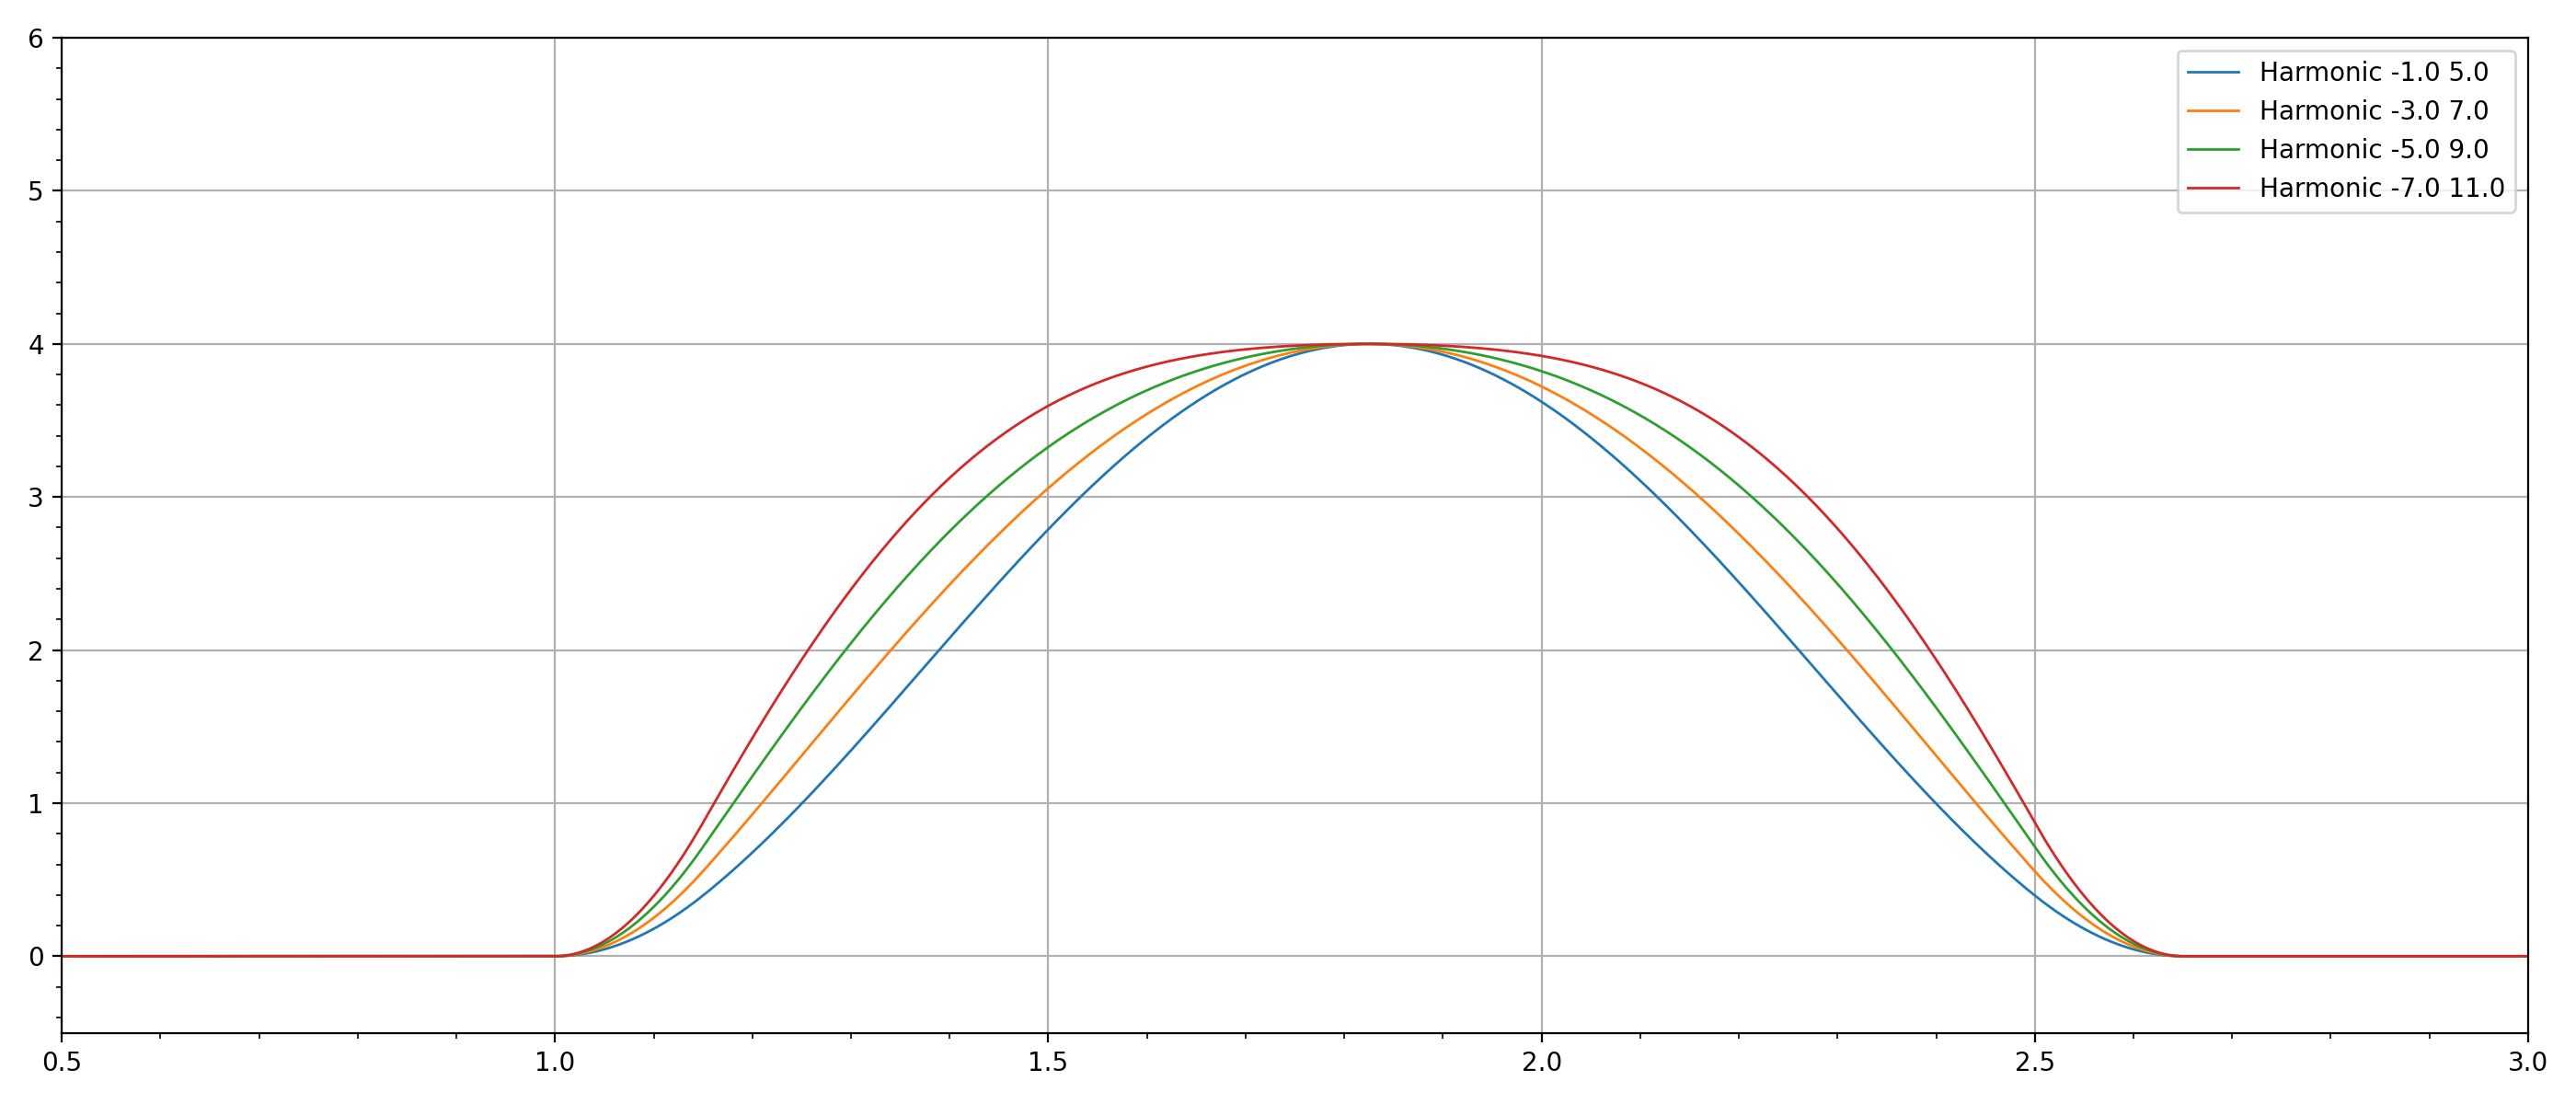

In [4]:
dist=np.arange(0.0,3.5,0.001)
%matplotlib notebook
import matplotlib.pyplot as plt1
plt1.ion()
plt1.figure(figsize=(14, 6))
g1=np.array([short_harmonic(x=x, x1=1.15, x2=2.5, top_val=-1.0)+short_harmonic(x=x, x1=1.0, x2=2.65, top_val=5.0)  for x in dist])  
g2=np.array([short_harmonic(x=x, x1=1.15, x2=2.5, top_val=-3.0)+short_harmonic(x=x, x1=1.0, x2=2.65, top_val=7.0)  for x in dist])
g3=np.array([short_harmonic(x=x, x1=1.15, x2=2.5, top_val=-5.0)+short_harmonic(x=x, x1=1.0, x2=2.65, top_val=9.0)  for x in dist])
g4=np.array([short_harmonic(x=x, x1=1.15, x2=2.5, top_val=-7.0)+short_harmonic(x=x, x1=1.0, x2=2.65, top_val=11.0)  for x in dist])
plt1.plot(dist, g1, label="Harmonic -1.0 5.0", linestyle='solid', linewidth=1, marker='*', markersize=0.0)
plt1.plot(dist, g2, label="Harmonic -3.0 7.0", linestyle='solid', linewidth=1, marker='*', markersize=0.0)
plt1.plot(dist, g3, label="Harmonic -5.0 9.0", linestyle='solid', linewidth=1, marker='*', markersize=0.0)
plt1.plot(dist, g4, label="Harmonic -7.0 11.0", linestyle='solid', linewidth=1, marker='*', markersize=0.0)
plt1.xlim(0.5, 3.0)
plt1.ylim(-0.5, 6)
plt1.grid()
plt1.tight_layout()
plt1.minorticks_on()
plt1.legend()
#plt2.savefig('test.png', dpi=600, transparent=True)
plt1.show()

# Sums of Gaussians

<IPython.core.display.Javascript object>


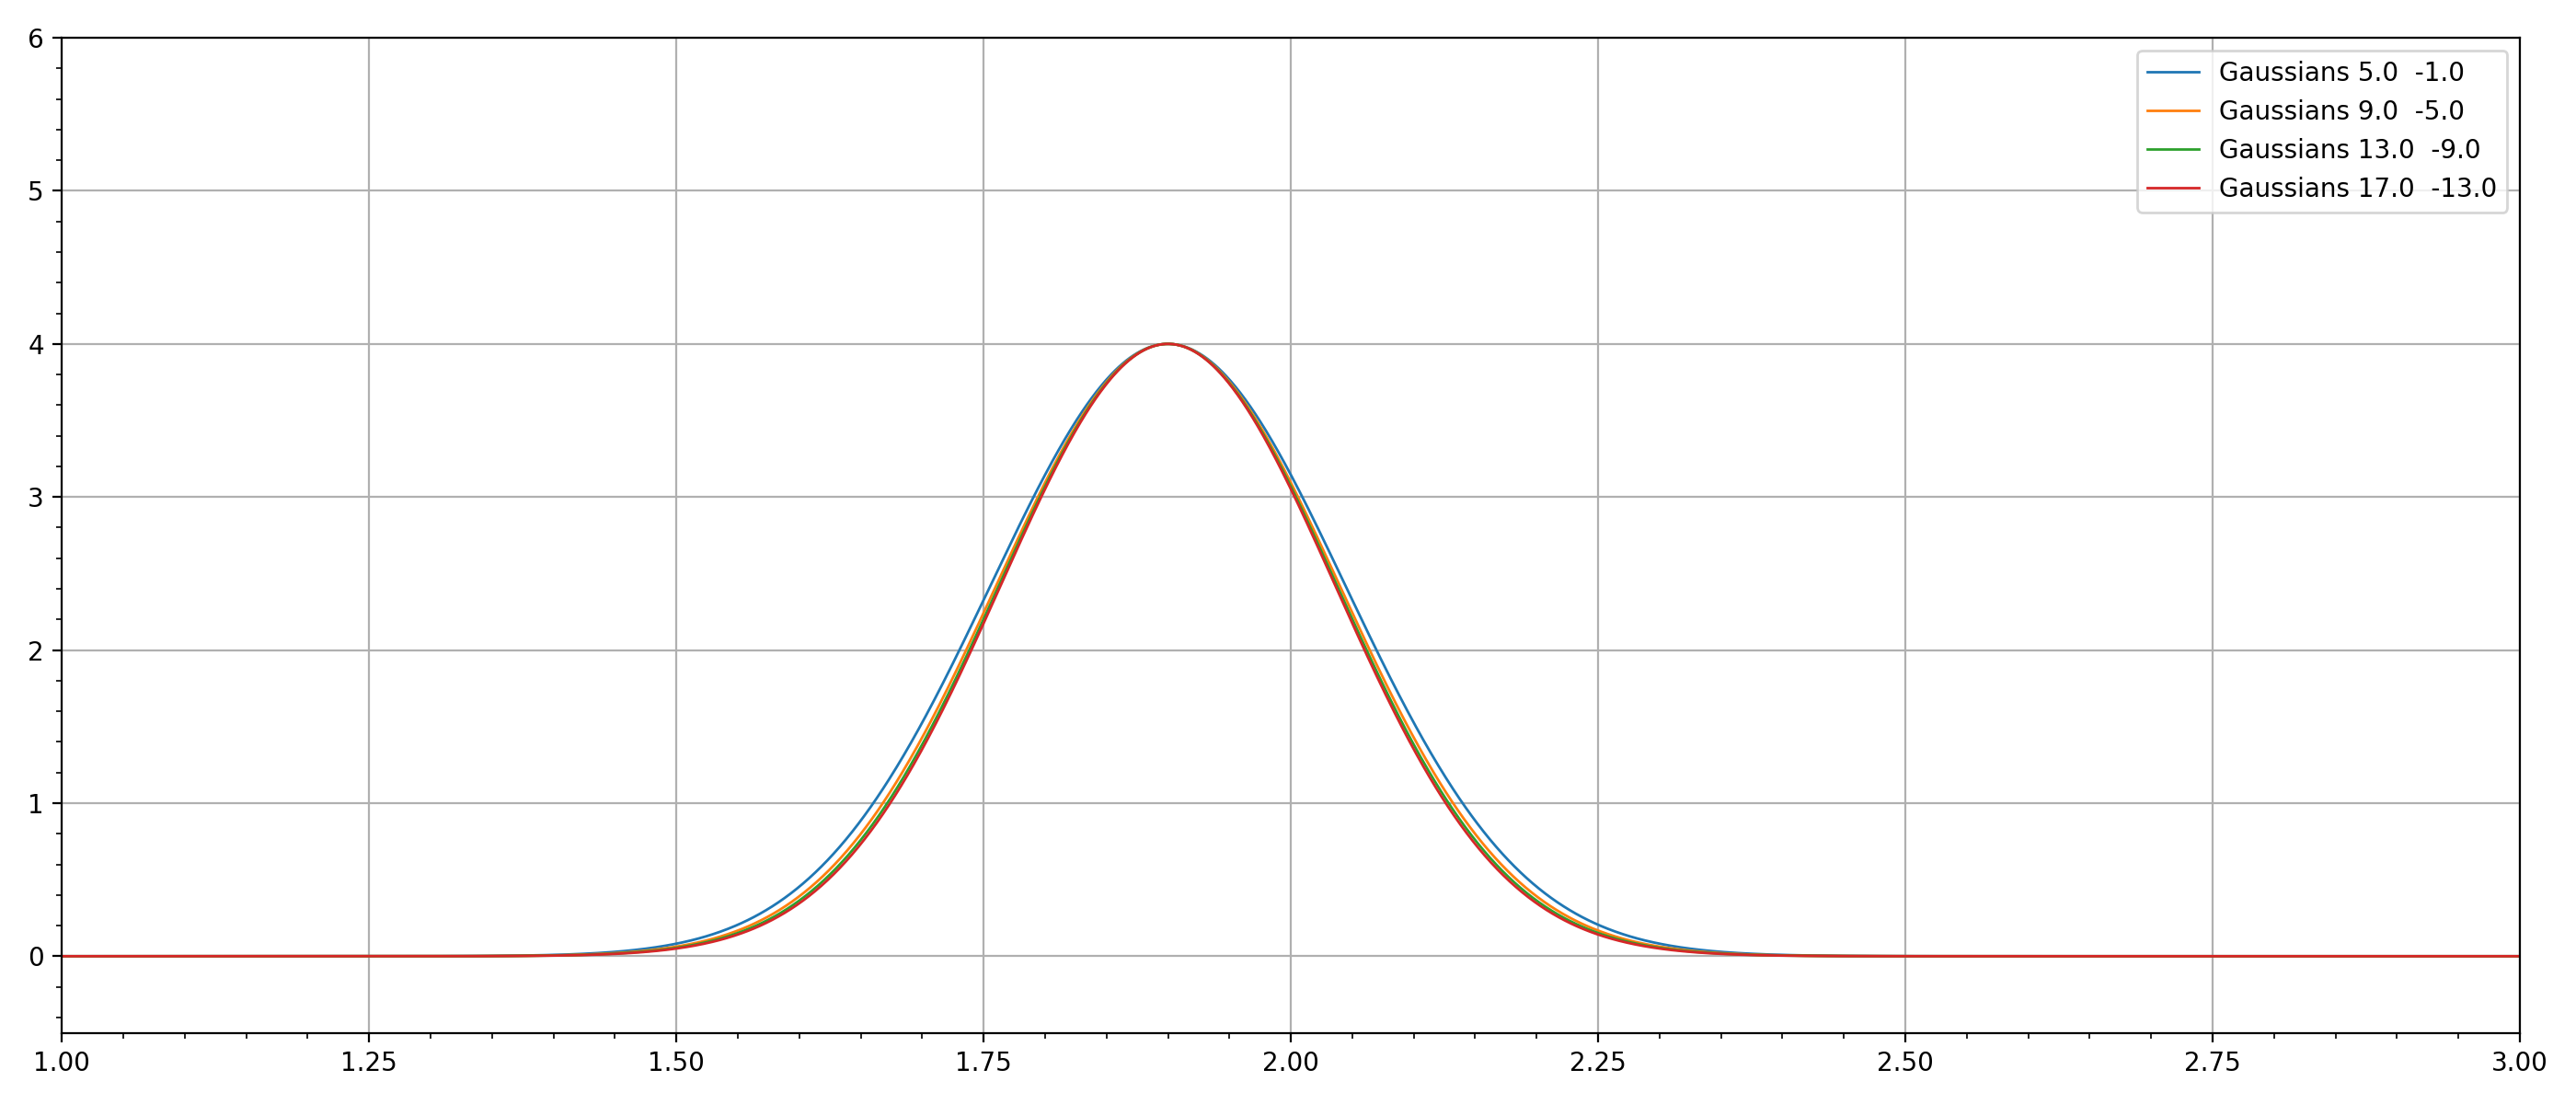

In [5]:
dist=np.arange(0.0,3.5,0.001)
%matplotlib notebook
import matplotlib.pyplot as plt2
plt2.ion()
plt2.figure(figsize=(14, 6))
h1=np.array([get_bounded_gaussian(x=x, x1=1.15, x2=2.65, top_val=5.0)+get_bounded_gaussian(x=x, x1=1.15, x2=2.65, top_val=-1.0)  for x in dist])  
h2=np.array([get_bounded_gaussian(x=x, x1=1.15, x2=2.65, top_val=9.0)+get_bounded_gaussian(x=x, x1=1.15, x2=2.65, top_val=-5.0)  for x in dist])
h3=np.array([get_bounded_gaussian(x=x, x1=1.15, x2=2.65, top_val=13.0)+get_bounded_gaussian(x=x, x1=1.15, x2=2.65, top_val=-9.0)  for x in dist])
h4=np.array([get_bounded_gaussian(x=x, x1=1.15, x2=2.65, top_val=17.0)+get_bounded_gaussian(x=x, x1=1.15, x2=2.65, top_val=-13.0)  for x in dist])
plt2.plot(dist, h1, label="Gaussians 5.0  -1.0", linestyle='solid', linewidth=1, marker='*', markersize=0.0)
plt2.plot(dist, h2, label="Gaussians 9.0  -5.0", linestyle='solid', linewidth=1, marker='*', markersize=0.0)
plt2.plot(dist, h3, label="Gaussians 13.0  -9.0", linestyle='solid', linewidth=1, marker='*', markersize=0.0)
plt2.plot(dist, h4, label="Gaussians 17.0  -13.0", linestyle='solid', linewidth=1, marker='*', markersize=0.0)
plt2.xlim(1.0, 3.0)
plt2.ylim(-0.5, 6)
plt2.grid()
plt2.tight_layout()
plt2.minorticks_on()
plt2.legend()
#plt2.savefig('test.png', dpi=1200, transparent=True)
plt2.show()

# Problems with the subtraction of Gaussians in subranges of other Gaussians

<IPython.core.display.Javascript object>


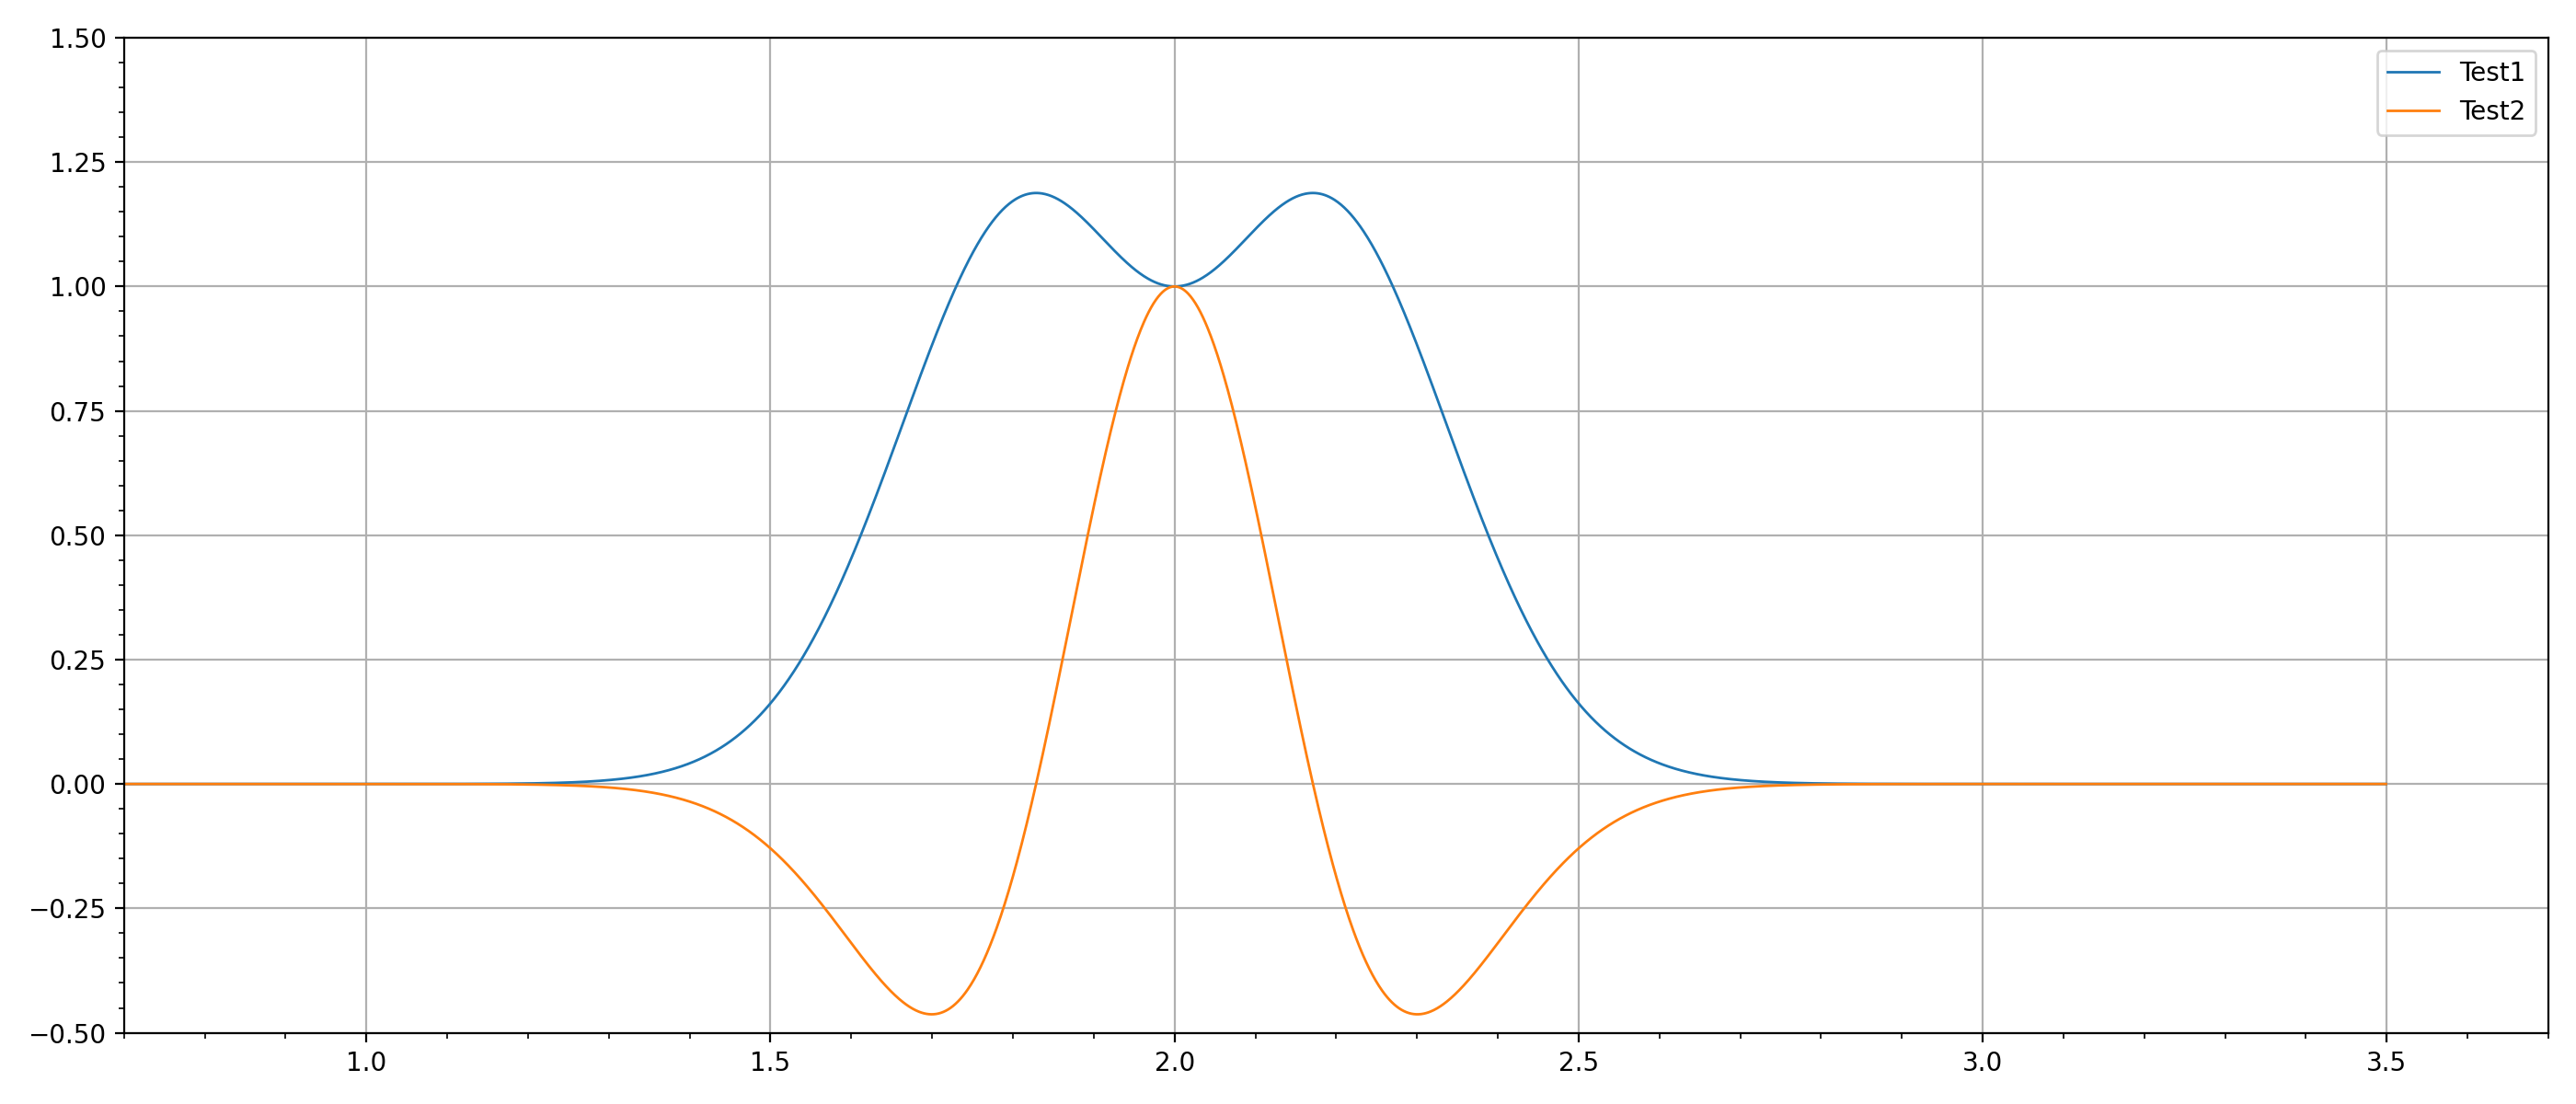

In [6]:
dist=np.arange(0.0,3.5,0.001)
%matplotlib notebook
import matplotlib.pyplot as plt3
plt3.ion()
plt3.figure(figsize=(14, 6))
h1=np.array([get_bounded_gaussian(x=x, x1=1.0, x2=3.0, top_val=5.0)+get_bounded_gaussian(x=x, x1=1.2, x2=2.8, top_val=-4.0)  for x in dist]) 
h2=np.array([get_bounded_gaussian(x=x, x1=1.0, x2=3.0, top_val=-4.0)+get_bounded_gaussian(x=x, x1=1.2, x2=2.8, top_val=5.0)  for x in dist])  
plt3.plot(dist, h1, label="Test1", linestyle='solid', linewidth=1, marker='*', markersize=0.0)
plt3.plot(dist, h2, label="Test2", linestyle='solid', linewidth=1, marker='*', markersize=0.0)
plt3.xlim(0.7, 3.7)
plt3.ylim(-0.5, 1.5)
plt3.grid()
plt3.tight_layout()
plt3.minorticks_on()
plt3.legend()
#plt3.savefig('test.png', dpi=1200, transparent=True)
plt3.show()